## Furniture Company -  Version 4

In this version a value combination that yields weak performance for the random agent is examined.

Aspects to consider when working with different combinations of variables:

### Variation among items

+ Looking at variation coefficients among the items for every month, a low value indicates that different furniture is built is distributed similarly.
+ At a higher value results indicate the concentration on one item mainly built at one month.

### Variation for each item over a year

+ Higher values indicate, that the months in which these items are built vary more, e.g they are built in just one month throughout the year.
+ Low values show that the distribution of items throughout the year is balanced.
+ This enables for example one item to be mainly built in every month, while other items can be relevant just in some months.

+ Values < 0.5 makes the items appear regularly
+ Values of >= 1 makes them appear in 8 of 12 months with different quantity.

+ A useful criterion would be values smaller than 1.1 and greater than 0.65.

## Model

In [1]:
# This is used to import the modules from the experiment folder
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
# First the model builder functionality needs to be imported.
from model_builder import Item, ModelBuilder
import numpy as np

In [2]:
# These values are needed to build the model
factor_resources = 8

# define the profit per month for each item:

chair_profit =    [2,3,3,2,2,1,2,3,2,2,2,2]
table_profit =    [5,6,4,5,4,3,4,5,4,4,3,3]
bed_profit =      [5,5,5,5,3,5,4,4,5,4,5,6]
bookcase_profit =[9,8,10,8,6,7,7,8,10,9,7,10]

# define the items:

chair = Item(costs_wood=4,costs_metal=1,costs_time_one=3,costs_time_two=1,profit=chair_profit)
table = Item(2,5,4,6,table_profit)
bed = Item(4,3,3,4, bed_profit)
bookcase = Item(5,7,5,4,bookcase_profit)

# Making calculations for one year
months = 12
# specifying available materials
avail_hours_a = 26*factor_resources
avail_hours_b = 30*factor_resources
avail_hours_c = 23*factor_resources
avail_hours_d = 26*factor_resources

avail_wood =  [468, 397, 457, 372, 322, 432, 413, 406, 377, 412, 395, 366]
avail_metal = [463, 378, 773, 380, 353, 391, 392, 473, 370, 350, 351, 293]


In [3]:
# Set up the model builder: 
model_builder = ModelBuilder(months=months, avail_wood=avail_wood, avail_metal=avail_metal
                            , avail_hours_a=avail_hours_a,avail_hours_b=avail_hours_b
                            , avail_hours_c=avail_hours_c,avail_hours_d=avail_hours_d
                            , chair=chair,table=table, bed=bed, bookcase=bookcase)
# build the model:
model = model_builder.build_model()


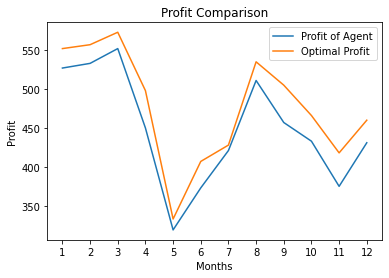

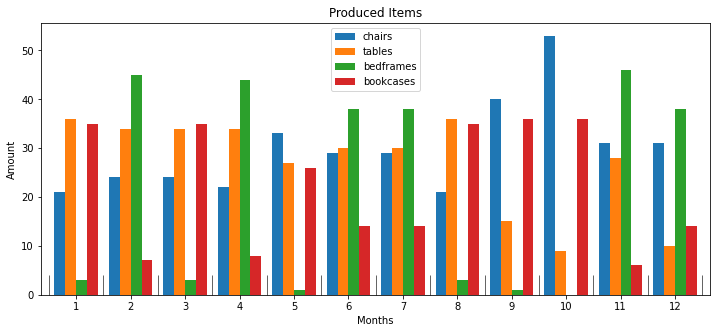

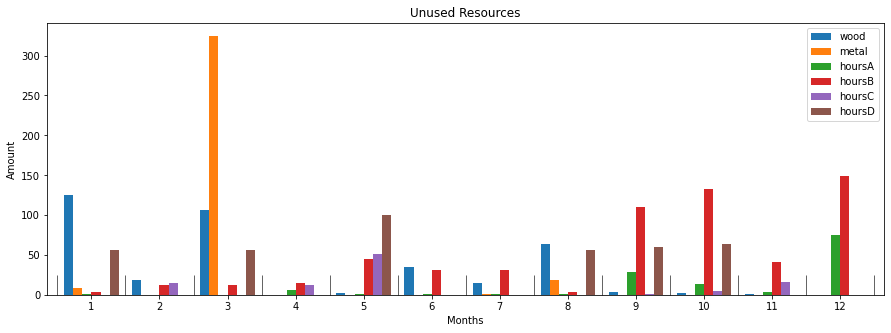

Variation for each month: 
 [0.5628380793808359, 0.5081159495448044, 0.5360283470945253, 0.49828237211384113, 0.5643900550432606, 0.3124710846130563, 0.3124710846130563, 0.5628380793808359, 0.6895109359632046, 0.8622298030317391, 0.5149340238718284, 0.4991610489649531]
Variation for each item over a year: 
 [0.29661595424487786, 0.35325335170260697, 0.9235255320152354, 0.550003982943657]


In [12]:
# importing a random agent
from agents import RandomAgent
from agents import stats
#agents = []

a = RandomAgent(model)
a.simulate_year()
a.plot_profits()
a.plot_produced_items(a.optimal_solution)
a.plot_unused_resources(a.optimal_solution)
variation_between_items = [stats.get_distributed_variation(a.optimal_solution, m) for m in range(12)]
variation_each_item = [stats.get_month_variation(a.optimal_solution, k) for k in a.optimal_solution.produced_items.keys()]
print('Variation for each month: \n', variation_between_items)
print('Variation for each item over a year: \n',variation_each_item)
# Save the model to export a game
#model_builder.save_model('model_v4')

In [ ]:
model_builder.save_model('model_v4')
a.optimal_solution.save_solution('model_v4')

## Random Agent
This agent solves the problem by randomly picking affordable items and producing a random number of the chosen item until nothing more can be produced. 

In [5]:
# importing a random agent
from agents import RandomAgent
agents = []
a = RandomAgent(model)
a.simulate_year()
agents.append(a)

In [39]:
#create multiple random agents and simulate the year
# Step through every month with the strategy of the agent
random_agents = []
for i in range(100):
    r = RandomAgent(model)
    r.simulate_year()
    random_agents.append(r)

mean_profits = [int(np.round(np.mean([agent.profits[i] for agent in random_agents]))) for i in range(12)]
print('Mean Profit of random agent: ', sum(mean_profits))
print('Optimal Solution Profit: ', sum(random_agents[0].optimal_solution.profits))

Mean Profit of random agent:  4815
Optimal Solution Profit:  5357


In [6]:
a.print_profits()

Agent solution:  5306
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,521,536,548,475,325,381,415,506,474,408,369,348


Optimal solution:  5732
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,552,557,573,498,333,407,428,535,505,466,418,460


### Plots

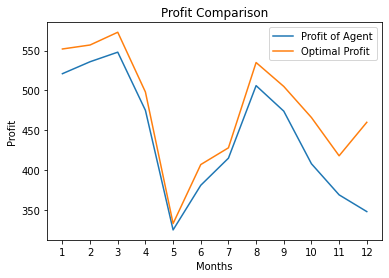

In [7]:
# Plot the profit for each month of the agent compared to the optimal solution
a.plot_profits()

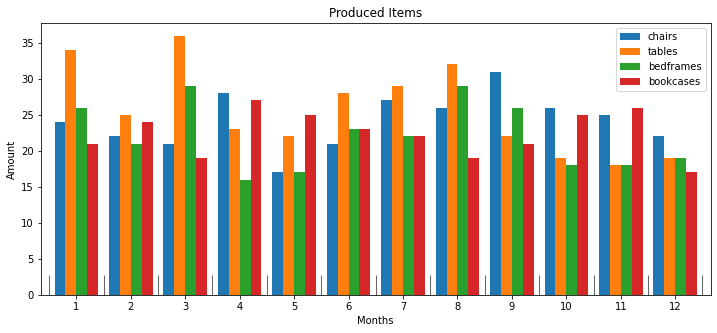

In [6]:
# Show the amount of produced items per month for the agent
a.plot_produced_items()

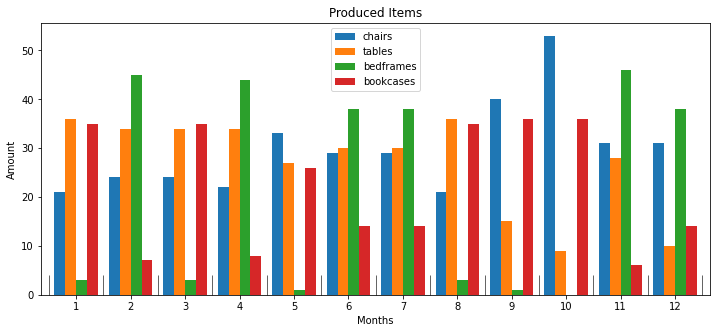

In [7]:
# Show the amount of produced items per month from the optimal solution
a.plot_produced_items(a.optimal_solution)

## Random All In

In [8]:
from agents import RandomAgentAllIn
random_all_in = RandomAgentAllIn(model)
random_all_in.simulate_year()
agents.append(random_all_in)

Agent solution:  4672
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,529,445,446,387,216,380,370,335,420,381,377,386


Optimal solution:  5732
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,552,557,573,498,333,407,428,535,505,466,418,460


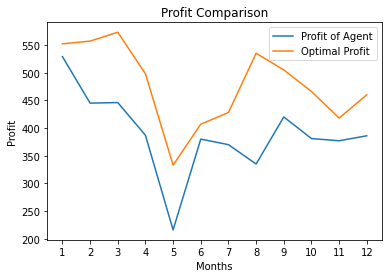

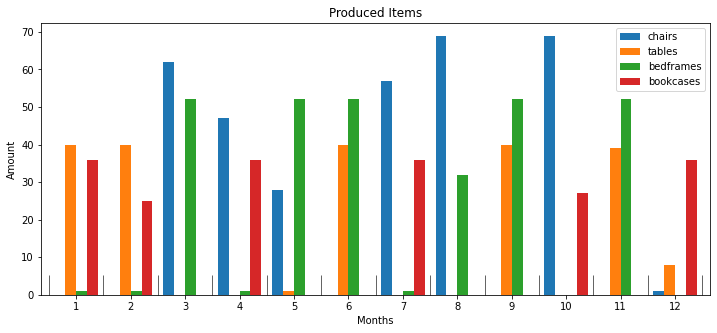

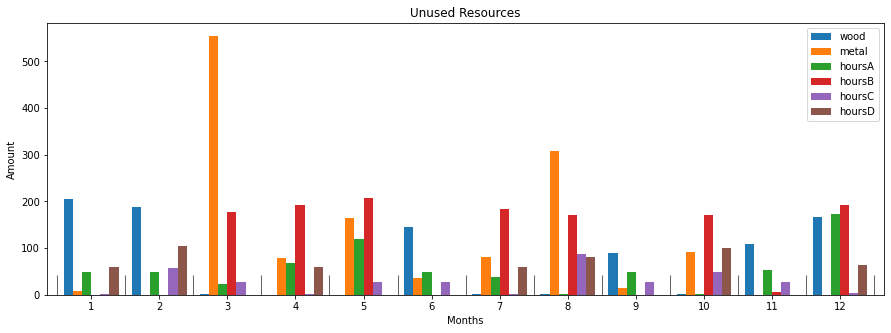

In [9]:
random_all_in.print_profits()
random_all_in.plot_profits()
random_all_in.plot_produced_items()
random_all_in.plot_unused_resources()

## ExpensiveMaterialAgent
This agent builds the products that have the highest costs first.
It does not make any differences between the costs, they are all recieve the same weight.

In [10]:
from agents import ExpensiveMaterialAgent

In [11]:
e = ExpensiveMaterialAgent(model)
e.simulate_year()
agents.append(e)

In [12]:
# Compare the agent profit with the optimal solution
e.print_profits()

Agent solution:  4969
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,529,441,525,418,298,339,364,492,457,404,316,386


Optimal solution:  5732
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,552,557,573,498,333,407,428,535,505,466,418,460


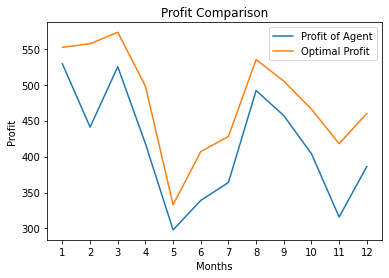

In [13]:
e.plot_profits()

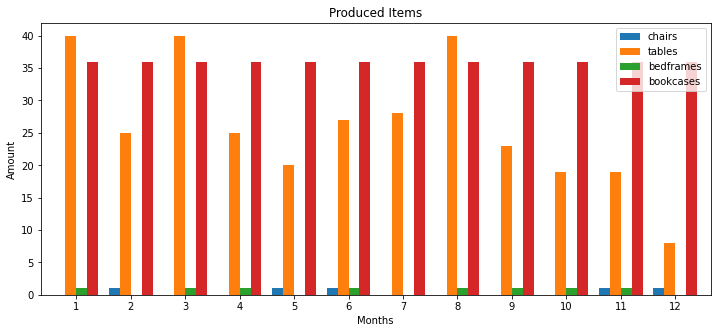

In [14]:
e.plot_produced_items()

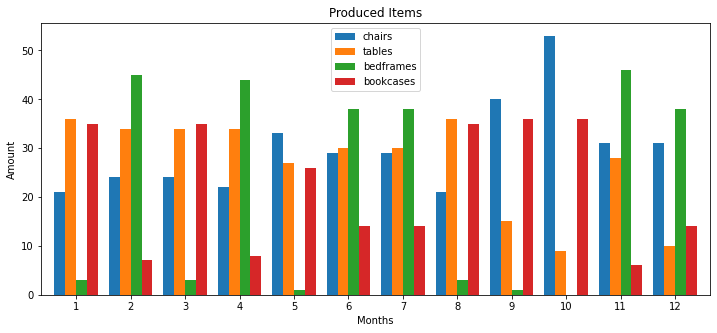

In [15]:
e.plot_produced_items(e.optimal_solution)

## NaiveProfitAgent
This agent builds the products that promise the most profit first.
It does not consider any costs.

In [16]:
from agents import NaiveProfitAgent
c = NaiveProfitAgent(model)
c.simulate_year()
agents.append(c)

In [17]:
c.print_profits()

Agent solution:  4976
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,529,441,525,418,298,339,364,492,457,404,316,393


Optimal solution:  5732
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,552,557,573,498,333,407,428,535,505,466,418,460


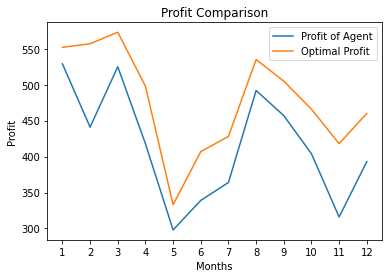

In [18]:
c.plot_profits()

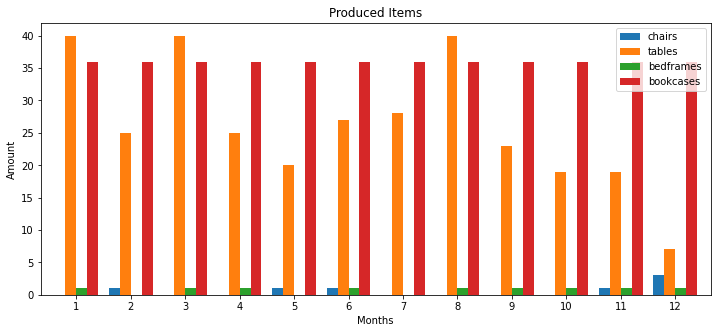

In [19]:
c.plot_produced_items()

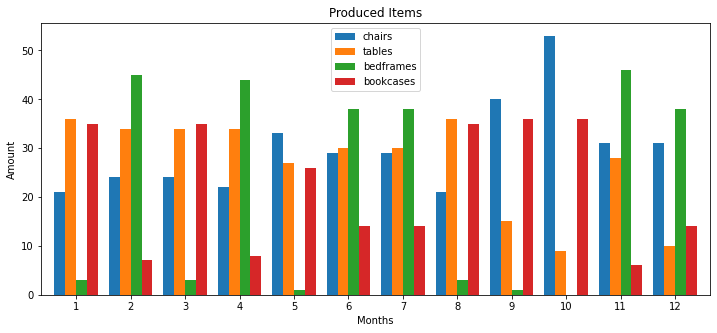

In [20]:
c.plot_produced_items(c.optimal_solution)

## MarginProfitAgent
This agent behaves the same as the naive profit agent but considers the costs of the items

In [21]:
from agents import MarginProfitAgent

In [22]:
margin_agent = MarginProfitAgent(model)
margin_agent.simulate_year()
agents.append(margin_agent)

In [23]:
margin_agent.print_profits()

Agent solution:  3559
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,378,357,432,258,171,264,274,335,263,274,283,270


Optimal solution:  5732
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,552,557,573,498,333,407,428,535,505,466,418,460


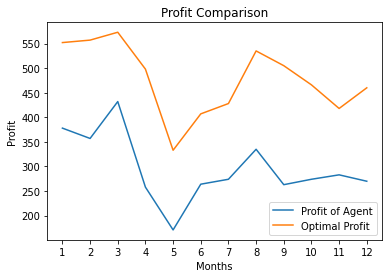

In [24]:
margin_agent.plot_profits()

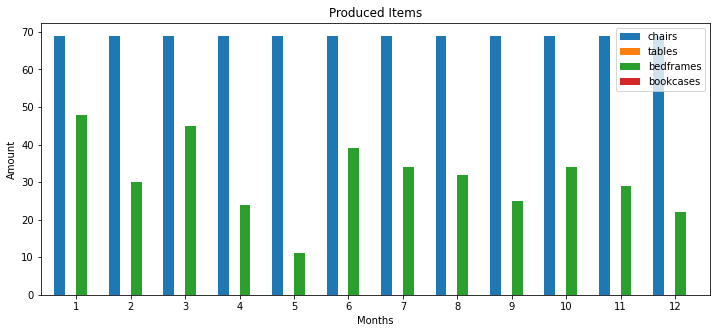

In [25]:
margin_agent.plot_produced_items()

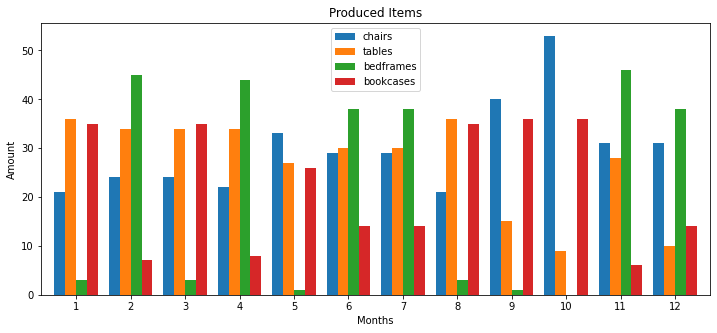

In [26]:
margin_agent.plot_produced_items(margin_agent.optimal_solution)

## Compare Agents

In [27]:
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display

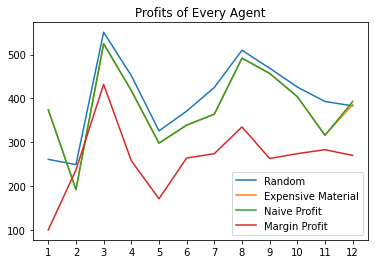

In [28]:
# Compare the profits of each agent
for a in agents:
    plt.plot(range(1,13), a.profits)
plt.legend([a.name for a in agents])
plt.title('Profits of Every Agent')
plt.xticks(range(1,13))
plt.show()

,Profit
Random,4816
Expensive Material,4565
Naive Profit,4572
Margin Profit,3161


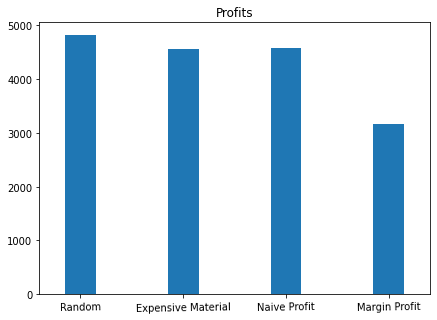

In [29]:
sums = [sum(a.profits) for a in agents]
df = pd.DataFrame(sums, index=[a.name for a in agents])
df.columns = ['Profit']
display(df)
df.plot(kind='bar', legend=False,width=0.3,figsize=(7,5),rot=1,title='Profits')
plt.show()

Random


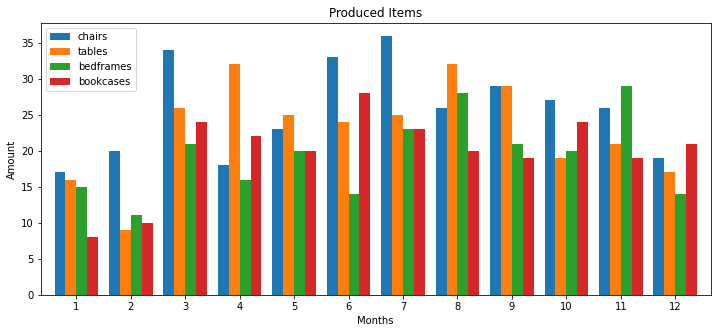

Expensive Material


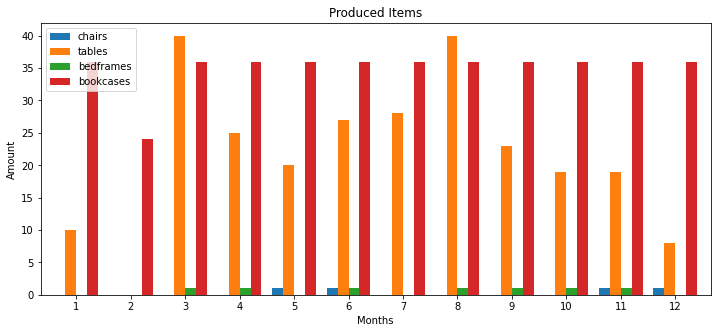

Naive Profit


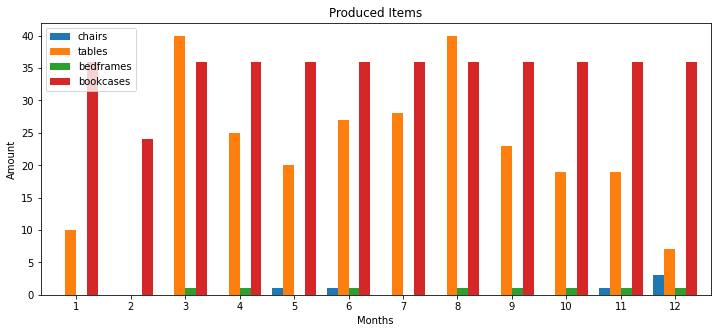

Margin Profit


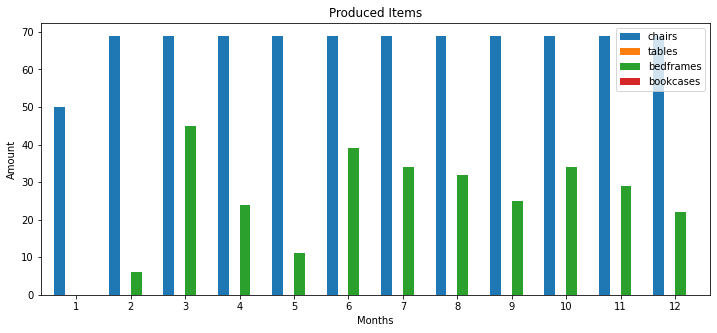

In [30]:
# Compare built Items
for a in agents:
    print(a.name)
    a.plot_produced_items()

Random


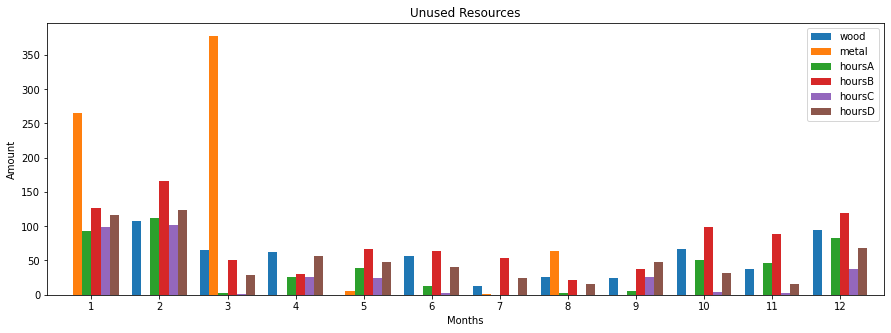

Expensive Material


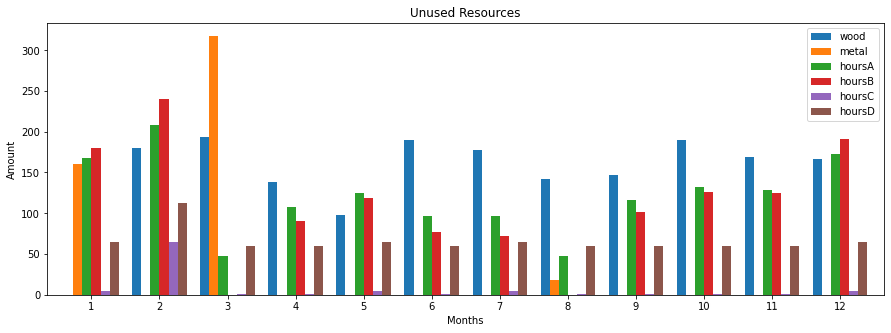

Naive Profit


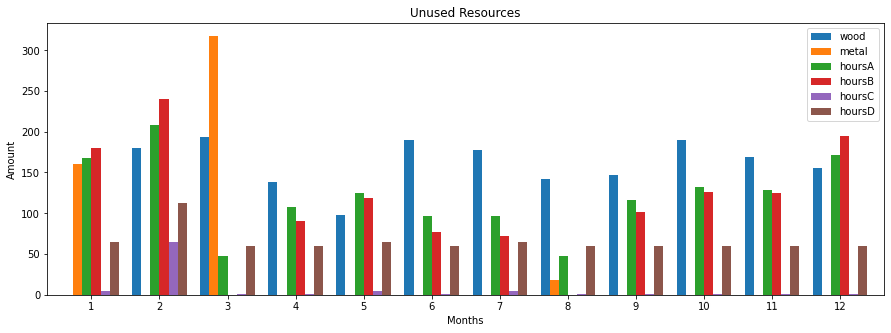

Margin Profit


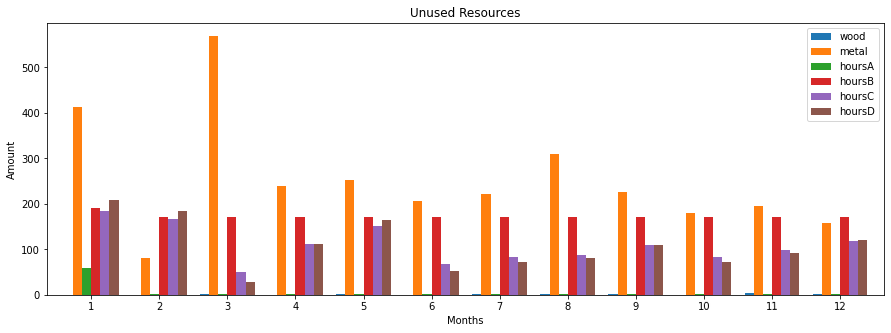

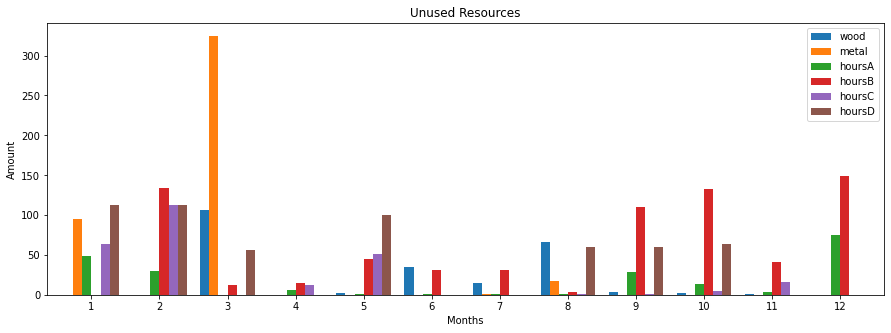

In [31]:
for a in agents:
    print(a.name)
    a.plot_unused_resources()
a.plot_unused_resources(a.optimal_solution)

## Review variation between items built
In this section the variation coefficient is used to compare the items built

In [32]:
from agents import stats
optimal_solution = RandomAgent(model).optimal_solution
variation_between_items = [stats.get_distributed_variation(optimal_solution, m) for m in range(12)]
variation_each_item = [stats.get_month_variation(optimal_solution, k) for k in optimal_solution.produced_items.keys()]

In [33]:
variation_between_items

[1.0606601717798212,
 0.8631338250816034,
 0.5360283470945253,
 0.49828237211384113,
 0.5643900550432606,
 0.3124710846130563,
 0.3124710846130563,
 0.6111236858019179,
 0.6895109359632046,
 0.8622298030317391,
 0.5149340238718284,
 0.4991610489649531]

In [34]:
variation_each_item

[0.4292496280823684,
 0.4241277225862158,
 0.9829803019097492,
 0.6042141647286667]

In [44]:
np.mean([1.0606601717798212,
 0.8631338250816034,
 0.5360283470945253,
 0.49828237211384113,
 0.5643900550432606,
 0.3124710846130563,
 0.3124710846130563,
 0.6111236858019179,
 0.6895109359632046,
 0.8622298030317391,
 0.5149340238718284,
 0.4991610489649531])

0.6103663698310673

In [35]:
from agents import WeightedMarginAgent
f = WeightedMarginAgent(model)

In [36]:
f.simulate_year()

True

In [37]:
f.print_profits()

Agent solution:  3165
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,100,241,432,258,171,264,274,335,263,274,283,270


Optimal solution:  5357
Profit for 12 Months:


,Month 1,2,3,4,5,6,7,8,9,10,11,12
0,416,318,573,498,333,407,428,535,505,466,418,460


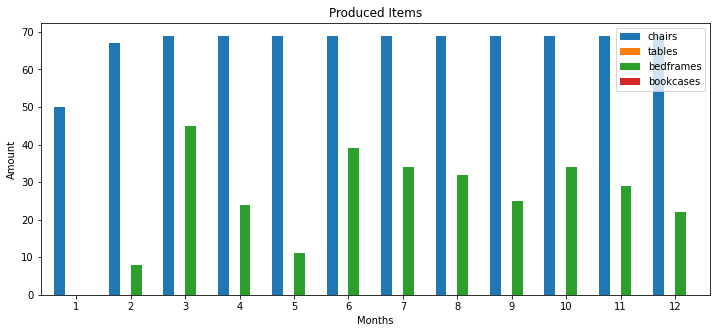

In [38]:
f.plot_produced_items()